# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../traffic-signs-data/train.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

#X_train=np.float32(X_train/255.0)
#X_test=np.float32(X_test/255.0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

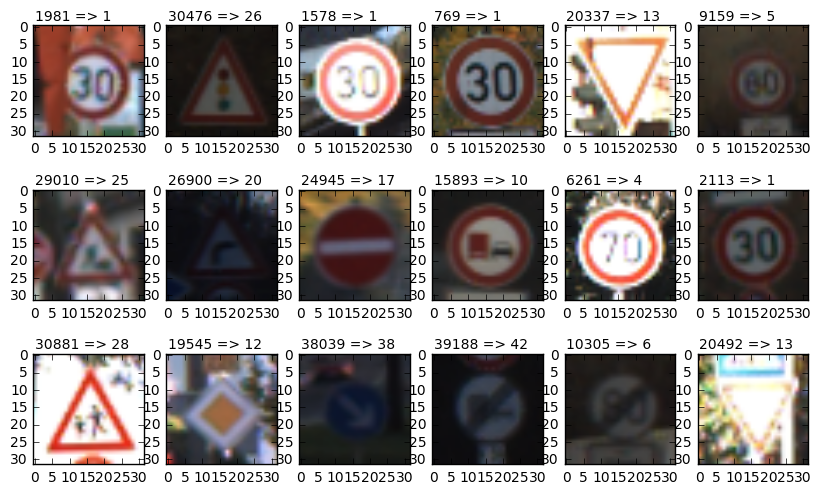

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize=(10,6))

def plotRandSigns(source,labels,ny,nx,sp):
    index = random.randint(0, len(source))
    image = source[index].squeeze()
    plt.subplot(ny, nx, sp)
    ax=plt.gca()
    plt.imshow(image)
    ax.text(0,-2,""+str(index)+" => "+str(labels[index])).draw(ax.figure.canvas.get_renderer())

for i in range(1,19):
    plotRandSigns(X_train,y_train,3,6,i)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

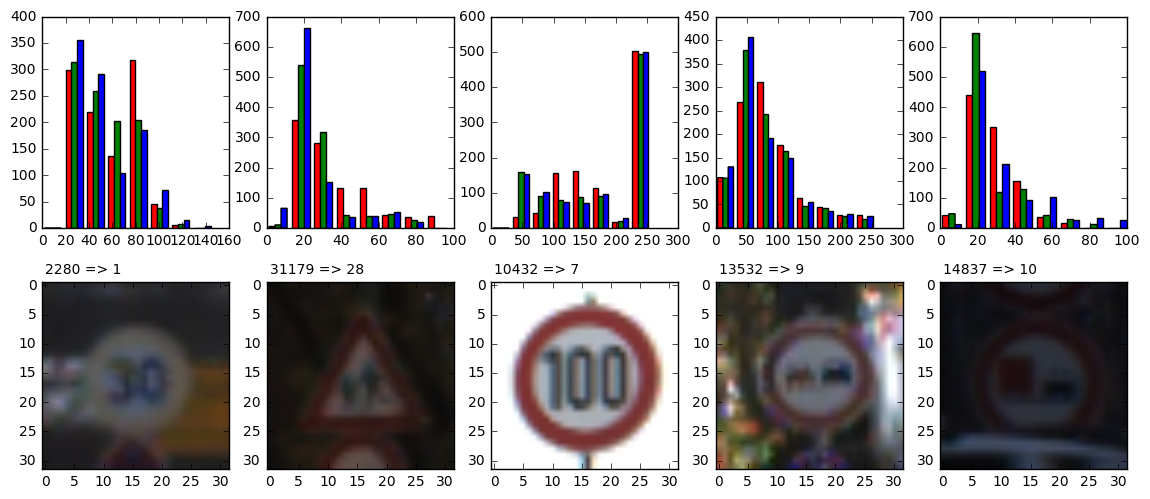

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import numpy as np
import cv2

def plotRandHist(source,index,nx,sp):
    image = source[index].squeeze()
    plt.subplot(2, nx, sp)
    n, bins, patches=plt.hist(np.array(image).reshape((32*32,3)), bins=8, range=(0,image.max()),color=['red','green','blue'])
    plt.subplot(2, nx, nx+sp)
    ax=plt.gca()
    plt.imshow(image)
    ax.text(0,-2,""+str(index)+" => "+str(y_train[index])).draw(ax.figure.canvas.get_renderer())
    return n, bins, patches

plt.figure(figsize=(14,6))

for i in range(1,6):
    index = random.randint(0, len(X_train))
    plotRandHist(X_train,index,5,i)


In [5]:
clahe = cv2.createCLAHE(clipLimit=4.0,tileGridSize=(2,2))

def normalizeImage(image):
    nrmImg=cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    nrmImg[:,:,0]=clahe.apply(nrmImg[:,:,0])
    #nrmImg[:,:,0]=cv2.equalizeHist(nrmImg[:,:,0])
    return (cv2.cvtColor(nrmImg, cv2.COLOR_YUV2RGB))
    #return np.float32(cv2.cvtColor(nrmImg, cv2.COLOR_YUV2RGB)/256.0)

In [6]:
def plotSigns(source,index,ny,nx,sp):
    image = source[index].squeeze()
    plt.subplot(ny*3, nx, (sp-1)*3+1)
    ax=plt.gca()
    plt.imshow(image)
    ax.text(0,-2,""+str(index)+" => "+str(y_train[index])).draw(ax.figure.canvas.get_renderer())

    eh_img1=normalizeImage(image)

    eh_img2 = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    eh_img2[:,:,0] = cv2.equalizeHist(eh_img2[:,:,0])
    eh_img2=cv2.cvtColor(eh_img2, cv2.COLOR_YUV2RGB)

    plt.subplot(ny*3, nx, (sp-1)*3+2)
    plt.imshow(eh_img1)
    plt.subplot(ny*3, nx, (sp-1)*3+3)
    plt.imshow(eh_img2)


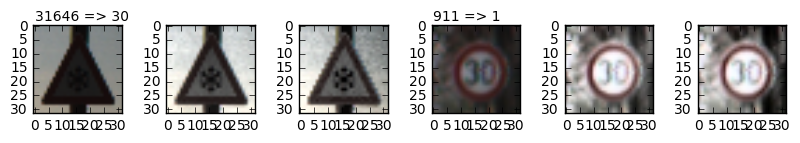

In [7]:
plt.figure(figsize=(10,8))
plotSigns(X_train,31646,2,6,1)
plotSigns(X_train,911,2,6,2)

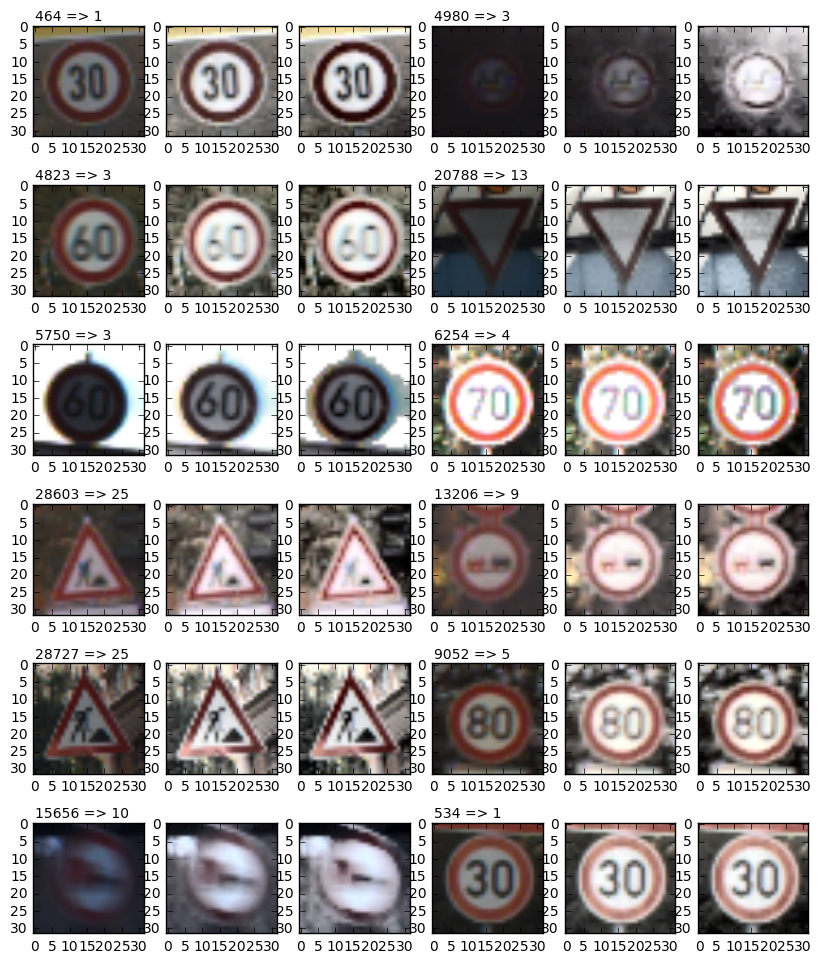

In [8]:
plt.figure(figsize=(10,12))


for i in range(1,13):
    index = random.randint(0, len(X_train))
    plotSigns(X_train,index,2,6,i)



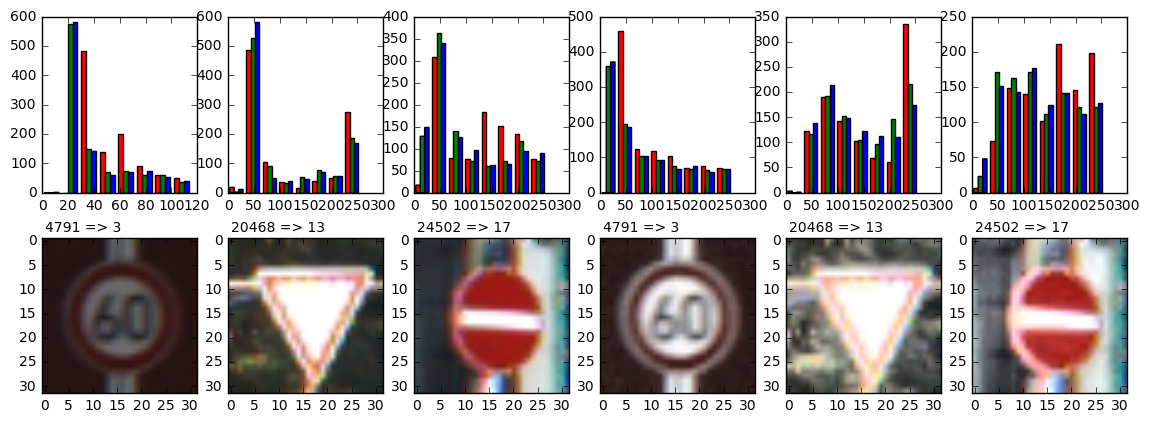

In [9]:
X_train_N=[]
for i in range(len(X_train)):
    X_train_N.append(normalizeImage(X_train[i]))
    
X_test_N=[]
for i in range(len(X_test)):
    X_test_N.append(normalizeImage(X_test[i]))

plt.figure(figsize=(14,5))

for i in range(1,4):
    index = random.randint(0, len(X_train))
    plotRandHist(X_train,index,6,i)
    plotRandHist(X_train_N,index,6,i+3)



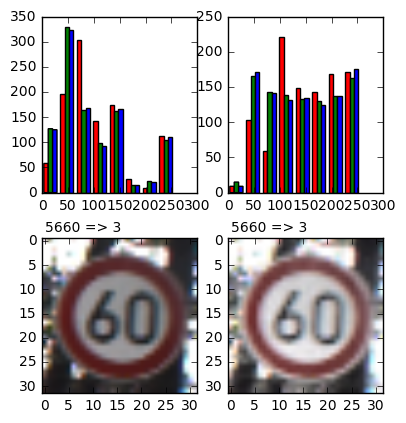

In [10]:
plt.figure(figsize=(14,5))
plotRandHist(X_train, 5660, 6, 1);
plotRandHist(X_train_N, 5660, 6, 2);


### Question 1 

Describe how you preprocessed the data. Why did you choose that technique?

**Answer:**
- increasing contrast, normalizing histogram using clahe from opencv
added after review #1:
- principle idea: if I find it hard to recognize a sign because it is too dark / too bright, the same will hold for a net that makes heavy use of linear operations. If the images are shifted to an intermediate brightness, that is similar for all images, the net does not need to perform this operation anymore.
- the idea to prefer Contrast Limited Adaptive Histogram Equalization (clahe) over equalizeHist is discussed here: http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html. 
- I just played around with the parameters until I "liked" the results. most probably it would also be sufficient to perform a simple histogram equalization.
- normalizing of the images to a scale -0.5...0.5 is done some sections below, see function rescale.

<Container object of 43 artists>

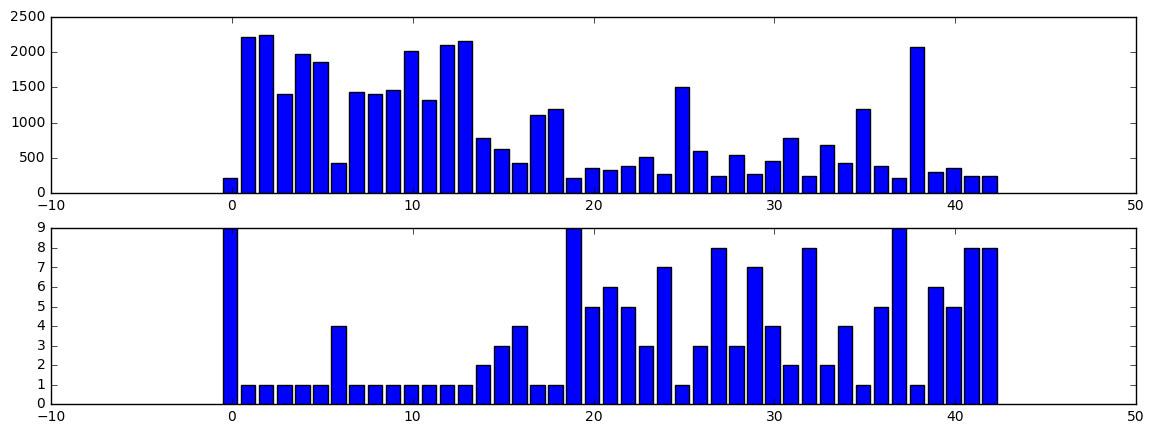

In [11]:
### Generate additional data (OPTIONAL!)
### how many examples per class?

# according to review #1
from collections import Counter
counter=Counter(y_train)
# </>

#counter = np.zeros(n_classes, np.int32)
factor = np.ones(n_classes, np.int32)
#for i in range(len(y_train)):
#    counter[y_train[i]]+=1
    
for i in range(n_classes):
    factor[i]=max(2000/counter[i],1)
    
plt.figure(figsize=(14,5))
plt.subplot(2, 1, 1)
plt.bar(np.arange(n_classes)-0.5, counter.values())
#plt.bar(np.arange(n_classes)-0.5, counter)
plt.subplot(2, 1, 2)
plt.bar(np.arange(n_classes)-0.5, factor)


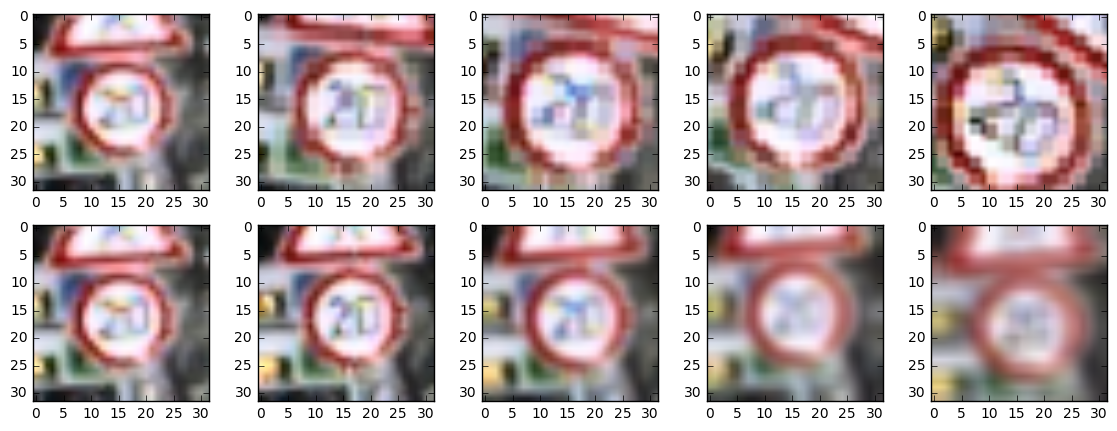

In [12]:
### methods for generating additional data: rotate, blur

import matplotlib.transforms as tr
import scipy
from scipy import misc
import math
from scipy import ndimage

def rotateImage(img, angle):
    if abs(angle)>0:
        padX = [1,1]
        padY=[1,1]
        imgP = np.pad(img, [padY, padX, [0, 0]], 'constant')
        imgR = ndimage.rotate(imgP, angle, reshape=True)
        x=np.int32(imgR.shape[0]/2.0-(32.0/(math.cos(math.pi*abs(angle)/180.)+math.sin(math.pi*abs(angle)/180.)))/2.0+0.5)
        imgR = imgR[x : -x, x : -x]
        z = 32.0/imgR.shape[0]
        img_resize=scipy.ndimage.zoom(imgR, (z, z, 1), order=0)
    else:
        img_resize = img
    return img_resize

def blurImage(img, d):
    if d>0:
        kernel = np.ones((d,d),np.float32)/(d*d)
        return cv2.filter2D(img,-1,kernel)
    else:
        return img
    
plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    image = X_train_N[i]
    image_rot=rotateImage(image, -i*10)
    plt.imshow(image_rot)

for i in range(5):
    plt.subplot(2, 5, 5+i+1)
    image = X_train_N[i]
    image_rot=blurImage(image, i)
    plt.imshow(image_rot)



In [13]:
def genData(image, number):
    trType=np.array(range(12))
    result=[]
    result.append(image)

    for i in range(number-1):
        idx=np.int32(len(trType)*random.random())
        if trType[idx]<=5:
            if trType[idx]<3:
                angle=(trType[idx]-3)*5
            else:
                angle=(trType[idx]-2)*5
            result.append(rotateImage(image, angle))
            trType=np.delete(trType, idx)
        else:
            result.append(blurImage(image, 3))
            trType=np.delete(trType, range(6-i, 12-i))
        #print(trType)
            
    return result

r=len(X_train_N)
X_train_N_ext=[]
y_train_ext=np.array([], np.uint8)
for i in range(r):
    f=factor[y_train[i]]
    generated=genData(X_train_N[i], min(f,5))
    X_train_N_ext=X_train_N_ext+generated
    y_gen=np.array(np.ones(min(f,5))*y_train[i], np.uint8)
    y_train_ext=np.concatenate((y_train_ext, y_gen))
    
#X_train_N=X_train_Next


<Container object of 43 artists>

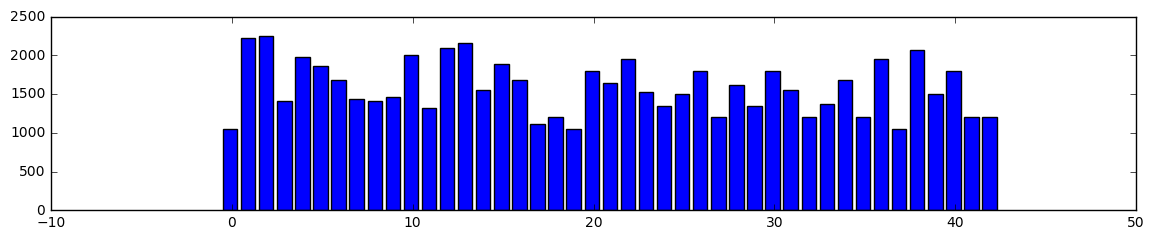

In [14]:
### how many examples per class?
#counter = np.zeros(n_classes, np.int32)
#for i in range(len(y_train_ext)):
#    counter[y_train_ext[i]]+=1
    
# according to review #1
from collections import Counter
counter=Counter(y_train_ext)
# </>

plt.figure(figsize=(14,2.5))
plt.bar(np.arange(n_classes)-0.5, counter.values())
#plt.bar(np.arange(n_classes)-0.5, counter)



In [15]:
def rescale(img):
    mn=img.min()
    mx=img.max()
    
    return (img-mn)/(mx-mn)-0.5


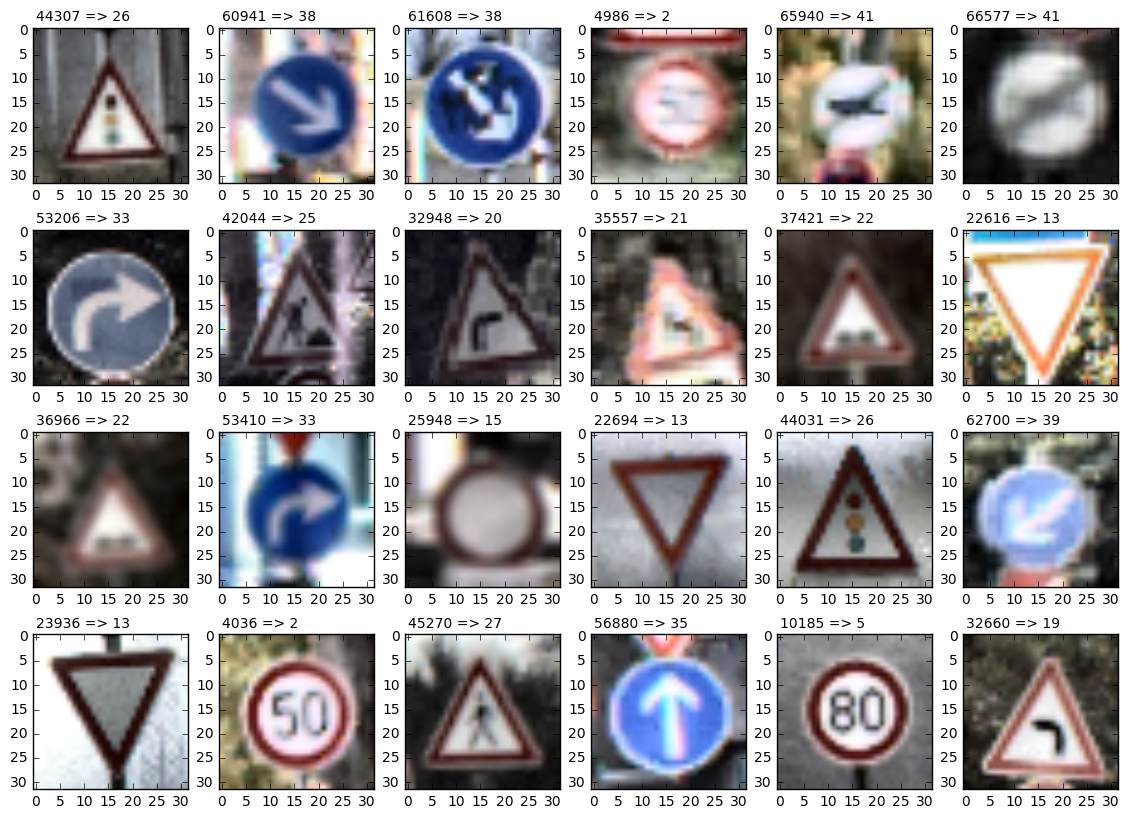

In [16]:
# old: finally: rescale train and test data to 0..1
# according to review #1, the data are now rescaled to -0.5..0.5

X_train_N_float = np.float32(np.array(X_train_N_ext, np.float32) / 255.0)
X_test_N_float = np.float32(np.array(X_test_N, np.float32) / 255.0)

X_train_N_resc=[]
for i in range(len(X_train_N_float)):
    X_train_N_resc.append(rescale(X_train_N_float[i]))
X_train_N_resc=np.array(X_train_N_resc, np.float32)
    
X_test_N_resc=[]
for i in range(len(X_test)):
    X_test_N_resc.append(rescale(X_test_N_float[i]))
X_test_N_resc=np.array(X_test_N_resc, np.float32)


plt.figure(figsize=(14,10))
for i in range(1,25):
    plotRandSigns(X_train_N_resc+0.5, y_train_ext,4,6,i)


In [17]:
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

#shuffle before split
from sklearn.utils import shuffle

X_train_N_resc, y_train_ext = shuffle(X_train_N_resc, y_train_ext)

# Get randomized datasets for training and validation
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train_N_resc,
    y_train_ext,
    test_size=0.2,
    random_state=832289)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
- additional images by rotating +-5°, 10°, 15° or blurring. Idea: http://bsft.io/x/17vh6w?uid=eb0ca4a3-b31f-4b1e-9a58-7b9f5289dcea&mid=d789410e-7465-4b5f-a6a0-e1045040f254
- ~~rescaling images to 32bit float, numbers from 0..255 to 0.0..1.0~~
- according to review #1 rescaling images to 32bit float, numbers from 0..255 to -0.5..0.5, see function rescale
- split training data into 80% training data and 20% validation data

In [18]:
import tensorflow as tf


In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# reusing LeNet
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def fullyconnected(x, W, b):
    fc = tf.add(tf.matmul(x, W), b)
    return fc

def Network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    layer_depth = {
        'layer_1': 12,
        'layer_2': 28,
        'fully_connected_1': 240,
        'fully_connected_2': 124,
        'n_classes': 43
    }

    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
            [5, 5, 3, layer_depth['layer_1']], mean=mu, stddev=sigma)),
        'layer_2': tf.Variable(tf.truncated_normal(
            [7, 7, layer_depth['layer_1'], layer_depth['layer_2']], mean=mu, stddev=sigma)),
        'fully_connected_1': tf.Variable(tf.truncated_normal(
            [4*4*28, layer_depth['fully_connected_1']], mean=mu, stddev=sigma)),
        'fully_connected_2': tf.Variable(tf.truncated_normal(
            [layer_depth['fully_connected_1'], layer_depth['fully_connected_2']], mean=mu, stddev=sigma)),
        'n_classes': tf.Variable(tf.truncated_normal(
            [layer_depth['fully_connected_2'], layer_depth['n_classes']], mean=mu, stddev=sigma))
    }
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
        'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
        'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
        'n_classes': tf.Variable(tf.zeros(layer_depth['n_classes'])),
    }

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1=conv2d(x, weights['layer_1'], biases['layer_1'])

    # TODO: Activation.
    # see conv2d

    # TODO: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1=maxpool2d(conv1)

    # TODO: Layer 2: Convolutional. Output = 8x8x28.
    conv2=conv2d(conv1, weights['layer_2'], biases['layer_2'])
    
    # TODO: Activation.
    # see conv2d

    # TODO: Pooling. Input = 10x10x16. Output = 4x4x28.
    conv2=maxpool2d(conv2)

    # TODO: Flatten. Input = 4x4x28. Output = 448.
    flat=tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 448. Output = 240.
    fc1=fullyconnected(flat, weights['fully_connected_1'], biases['fully_connected_1'])
    
    # TODO: Activation.
    fc1=tf.nn.softsign(fc1)

    # TODO: Layer 4: Fully Connected. Input = 240. Output = 124.
    fc2=fullyconnected(fc1, weights['fully_connected_2'], biases['fully_connected_2'])
    
    # TODO: Activation.
    fc2=tf.nn.softsign(fc2)

    # TODO: Layer 5: Fully Connected. Input = 124. Output = 43.
    out=fullyconnected(fc2, weights['n_classes'], biases['n_classes'])
    
    return out

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify traffic sign data.

In [42]:
rate = 0.0025

out = Network(x)
logits=tf.nn.softsign(out)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [43]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
- derived from LeNet 5 architecture
    1. first convolution layer takes care about 3 color channels; 5x5x3, output depth 12; activation with relu
    2. 2x2 maxpool reduces to 14x14x12
    3. second conv layer: 7x7x12, output depth 28; activation with relu
    4. 2x2 maxpool reduces to 4x4x28
    5. fully connected 1 outputs 240
    6. activation with softsign
    7. fully connected 2 outputs 124
    8. activation with softsign
    9. fully connected 3 outputs the number of classes 43
    10. for training, also the output layer gets an activation with softsign

- initialisation of weights with mu=0 and sigma=0.1, as in the LeNet-Lab


## Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [44]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 512 # 2048

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_split)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_split, y_train_split = shuffle(X_train_split, y_train_split)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_split[offset:end], y_train_split[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_split, y_valid_split)
        print("EPOCH {} ... ".format(i+1)+"Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, 'tsc')
    print("Model saved")

Training...

EPOCH 1 ... Validation Accuracy = 0.811
EPOCH 2 ... Validation Accuracy = 0.914
EPOCH 3 ... Validation Accuracy = 0.937
EPOCH 4 ... Validation Accuracy = 0.927
EPOCH 5 ... Validation Accuracy = 0.928
EPOCH 6 ... Validation Accuracy = 0.937
EPOCH 7 ... Validation Accuracy = 0.945
EPOCH 8 ... Validation Accuracy = 0.953
EPOCH 9 ... Validation Accuracy = 0.953
EPOCH 10 ... Validation Accuracy = 0.960
EPOCH 11 ... Validation Accuracy = 0.957
EPOCH 12 ... Validation Accuracy = 0.963
EPOCH 13 ... Validation Accuracy = 0.962
EPOCH 14 ... Validation Accuracy = 0.968
EPOCH 15 ... Validation Accuracy = 0.969
EPOCH 16 ... Validation Accuracy = 0.973
EPOCH 17 ... Validation Accuracy = 0.974
EPOCH 18 ... Validation Accuracy = 0.978
EPOCH 19 ... Validation Accuracy = 0.980
EPOCH 20 ... Validation Accuracy = 0.985
Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Adam Optimizer
- ~~Batch Size = 2048~~
- Batch Size = 512
- ~~250 epochs~~
- 20 epochs
- ~~learning rate = 0.0005~~
- learning rate = 0.0025

using the normalization to -0.5...0.5, I noticed a notable improvement of the validation accuracy in the first epoch by about 0.1..0.2. on the long run (later epochs), I could not see a systematic improvement any more. still, I further experimented with learning rate (finally 0.0025) and found out that 20 epochs are sufficient. 

I also tried smaller values of the batch size, starting at about 128, with reduced learning rate of 0.0005. results are similar.

A bigger number of epochs with a smaller learning rate led to similar results, especially related to the classification of the images I found on the internet. Most notably, the second image was never classified correctly, although it is a nice image of a "Pedestrians" sign. I could not figure out the reason. 

The performance on the test data is always about 5% below the performance on the validation set (sorry for multiple evaluations of the test data; I could not resist...). I cannot judge if this is a sign for overfitting; however, also with only 20 epochs I get this result which argues against overfitting; similar observations for my images from the internet.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
- trial and error playing around with the parameters.
- solution is based on the LeNet-5 architecture. traffic sign classification should be a problem that is closely related to the classification of hand written digits.

I changed learning rate and number of epochs a lot; I combined small learning rate=0.0005 with high number of epochs=250, and at the opposite a learning rate=0.0025 and epochs=20. I find it interesting that validation accuracy is always about 5% above the accuracy on the test data. initially, I started with small learning rate in order not to "overshoot" the destiation. however, trial and error led to way higher learning rates combined with smaller number of epochs, with equally good results, and of course way shorter computation times.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

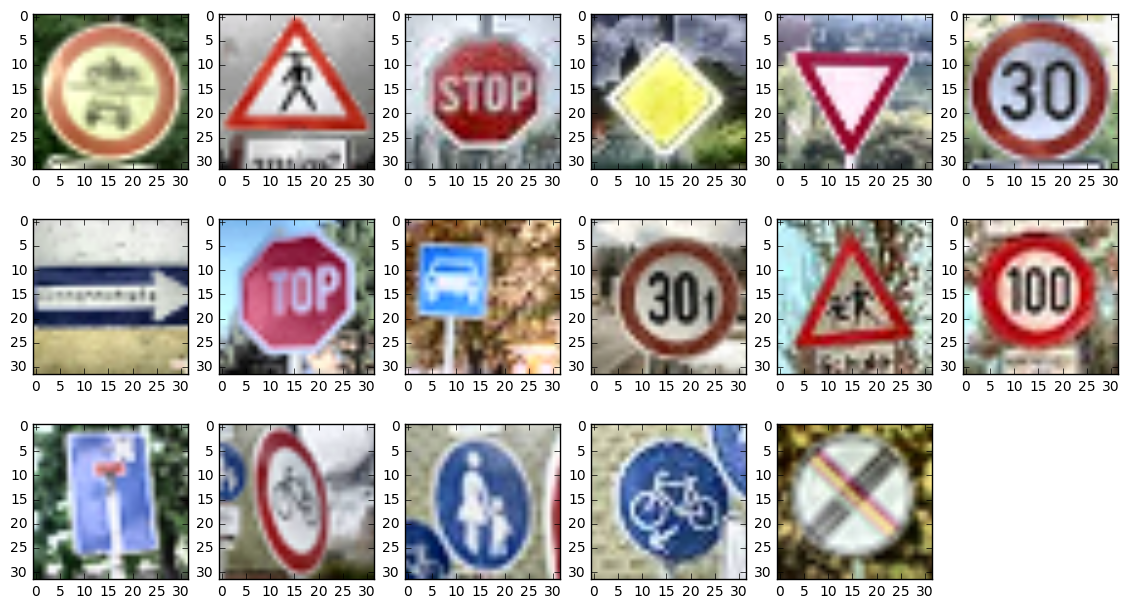

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

X_check=[]
for idx in range(1,18):
    image = mpimg.imread("../examples/{:02}.png".format(idx))
    X_check.append(image)
    
X_check=np.array(X_check, np.float32)
X_check=X_check*255
X_check=np.uint8(X_check)

X_check[1]=np.fliplr(X_check[1])

X_check_N=[]
for i in range(len(X_check)):
    X_check_N.append(rescale(np.float32(normalizeImage(X_check[i]))))
    
#X_check_N=np.float32(X_check_N)/255.0

plt.figure(figsize=(14,7.5))
for i in range(len(X_check_N)):
    plt.subplot(3,6,i+1)
    plt.imshow(X_check_N[i]+0.5)
    
    

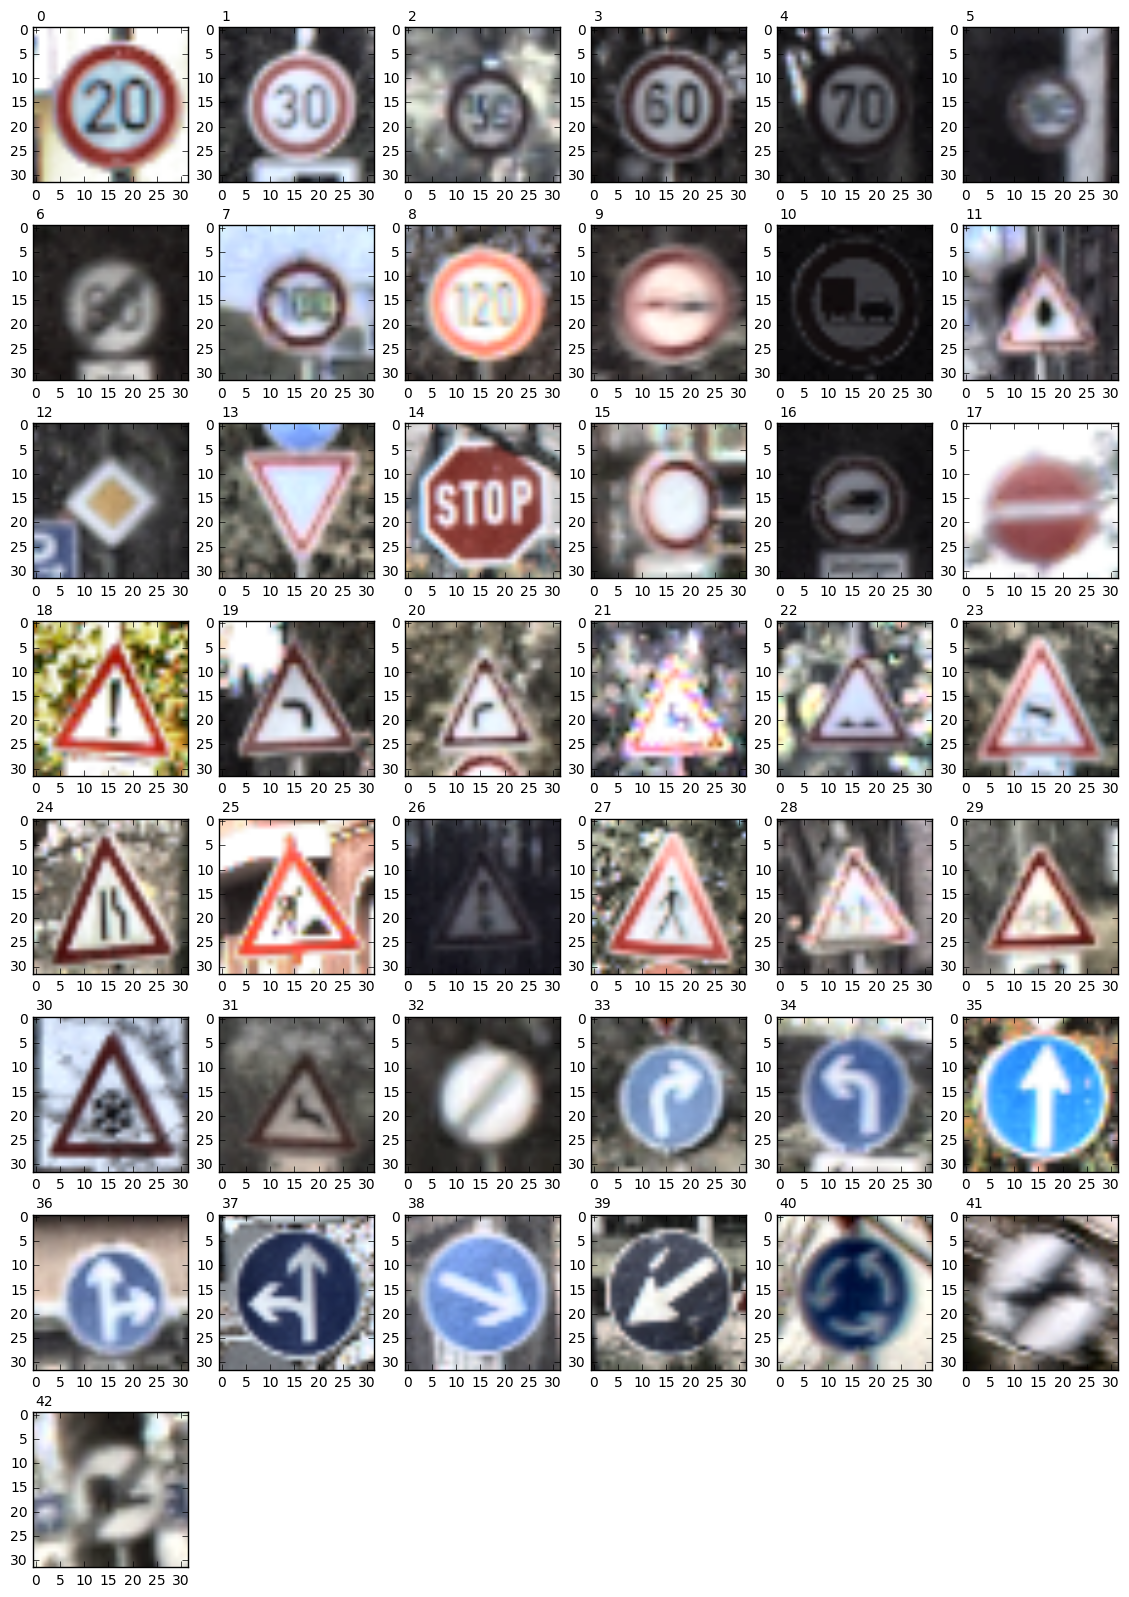

In [46]:
# show a random example of all the 43 classes
ex=np.ones(43, np.int32)*-1
while min(ex)<0:
    idx=random.randint(0, len(y_train))
    if ex[y_train[idx]]<0:
        ex[y_train[idx]]=idx
        
plt.figure(figsize=(14,20))

for i in range(43):
    plt.subplot(8,6,i+1)
    ax=plt.gca()
    plt.imshow(normalizeImage(X_train[ex[i]]))
    ax.text(0,-2,""+str(i)).draw(ax.figure.canvas.get_renderer())


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- 17 examples
- there are a few images that are not represented in the training data base: index 0, 6, 8, 9, 12, 13, 14, 15. still, looking at the softmax probabilities, the model seems to be very confident about its classification.
- the remaining 10 examples are represented in the training data base. the classification is clearly wrong for index 1 and index 11, so 2 out of 10. i'm not clear about why this _nice_ images are classified incorrectly. however, uncertainty in terms of entropy is relatively high for the wrong predictions
- image index #7 is classified correctly, although the "s" is missing in the stop sign.
- it's nice to see that index 16 is classified correctly


In [47]:
def entropy(probs):
    idx=np.where(probs>0)
    lprobs=np.log(probs[idx])
    return abs(np.sum(probs[idx]*lprobs))


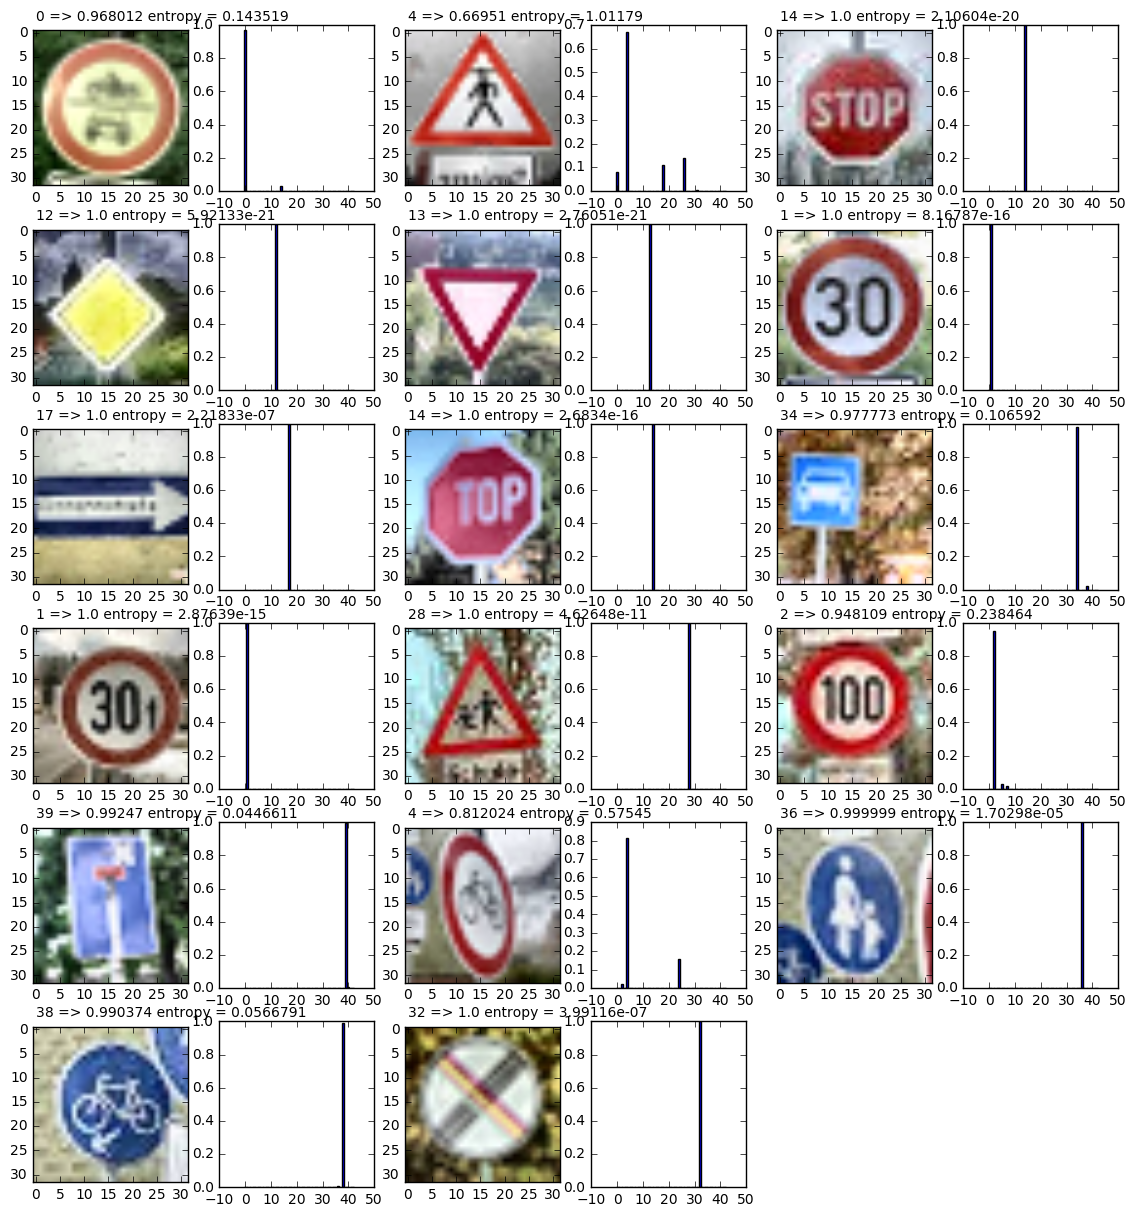

In [48]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

sm=tf.nn.softmax(out)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    prediction = sess.run(sm, feed_dict={x: X_check_N})

### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# for all examples, plot the image, and add a label for the class along with 
# the softmax probability. 
plt.figure(figsize=(14,15))
for i in range(len(prediction)):
    cls=np.where(prediction[i]==max(prediction[i]))
    plt.subplot(6,6,2*i+1)
    ax=plt.gca()
    plt.imshow(X_check_N[i]+0.5)
    ax.text(0,-2.5,""+str(cls[0][0])+" => "+str(prediction[i,cls][0][0])+" entropy = "+str(entropy(prediction[i]))).draw(ax.figure.canvas.get_renderer())
    plt.subplot(6,6,2*i+2)
    plt.bar(np.arange(n_classes)-0.5, prediction[i])


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
as already stated in the answer to question 6, the accuracy of the predictions on the examples from the internet _that are represented in the training data_ is 80%. This compares to 93.4% of accuracy for the test data (see code section below).

please note that the 80% I achieved in this run are by far more realistic than the 90% that I claimed in my first hand-in; this high number was barely reproducible.

In [49]:

with tf.Session() as sess:

    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_N_resc, y_test)

    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Test Accuracy = 0.934


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
certainty, or better uncertainty, can be measured using entropy, see below.

- the top_k for the wrong prediction on the image index 1 (with k=5) does not contain the correct class
- the top_k for the wrong prediction on the image index 11 (with k=5) does contain the correct class (7) as its third entry


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    tk = sess.run(tf.nn.top_k(sm, k=5), feed_dict={x: X_check_N})


In [51]:
tk.indices

array([[ 0, 14, 15,  4,  1],
       [ 4, 26, 18,  0, 31],
       [14,  0, 10, 25,  1],
       [12, 21, 23,  1, 15],
       [13,  9,  2, 28, 22],
       [ 1,  2,  0,  5,  4],
       [17, 31,  2,  8, 40],
       [14, 25,  2, 13, 29],
       [34, 38, 30, 32, 36],
       [ 1,  0,  2,  4,  5],
       [28, 29, 20,  0, 11],
       [ 2,  5,  7, 10,  3],
       [39, 40, 35, 36, 37],
       [ 4, 24,  2, 36, 40],
       [36, 38, 34, 39, 37],
       [38, 36, 40, 39, 34],
       [32, 12, 41,  1, 26]], dtype=int32)

In [52]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def eval_entropy(X_data, y_data):
    num_examples = len(X_data)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        entropies=np.zeros(len(X_data))
        correct = np.zeros(len(X_data))
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            prediction = sess.run(sm, feed_dict={x: batch_x})
            for i in range(len(prediction)):
                entropies[offset+i]=entropy(prediction[i])
                correct[offset+i]=np.argmax(prediction[i])==y_data[offset+i]
        
    return entropies, correct

S, c=eval_entropy(X_test_N_resc, y_test)


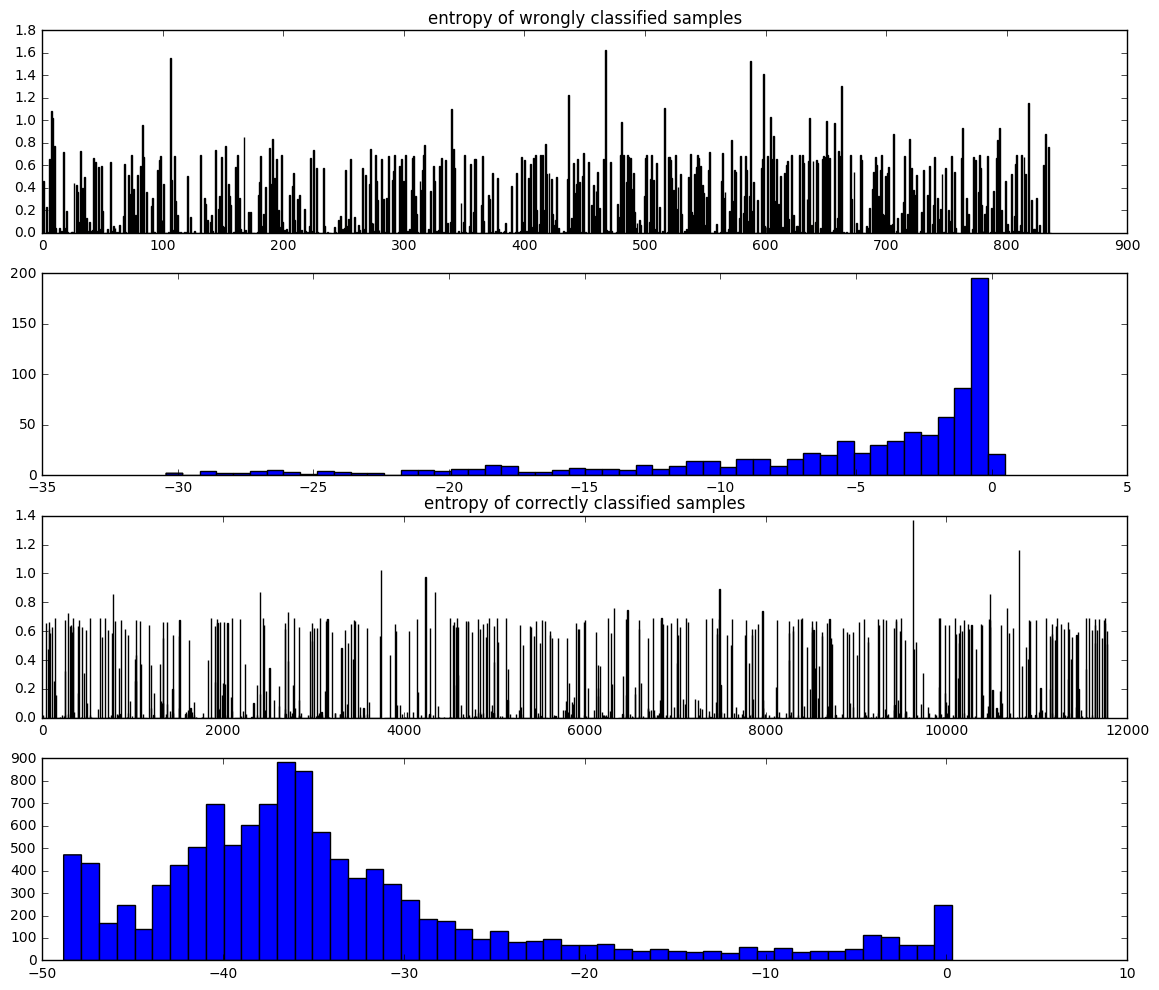

In [53]:
### find examples that are wrongly classified
idxF = np.where(c<0.5)

plt.figure(figsize=(14,12))
plt.subplot(4,1,1)
plt.bar(np.arange(len(idxF[0])), S[idxF[0]])
plt.title('entropy of wrongly classified samples')
plt.subplot(4,1,2)
plt.hist(np.log(S[idxF[0]]), 50);

### find examples that are correctly classified
idxT = np.where(c>0.5)

plt.subplot(4,1,3)
plt.bar(np.arange(len(idxT[0])), S[idxT[0]])
plt.title('entropy of correctly classified samples')
plt.subplot(4,1,4)
plt.hist(np.log(S[idxT[0]]), 50);



Looking at the log of the entropy, comparing the correct and the wrong predictions, it becomes clear that
- the "center of mass" of the histograms is very intuitive: for the wrong predictions, there is high uncertainty, for the correct predictions, there is very low uncertainty
- still there is a high number of wrong predictions with extremely high certainty.